<a href="https://colab.research.google.com/github/DerNiccoo/TheEarlyBird/blob/main/Aufgabe1/Alina/MNIST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [2]:
device = torch.device("cpu")

In [22]:
n_epochs = 50
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [18]:
#Load the data
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [17]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        x = x.view(-1, 784)
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return F.log_softmax(y_pred)

In [16]:

# Construct our model by instantiating the class defined above
N, D_in, H, D_out = 64, 784, 100, 10
model = TwoLayerNet(D_in, H, D_out)
optimizer = optim.SGD(model.parameters(), lr=learning_rate,
                      momentum=momentum)

# Define parameters for testing
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

#Training 
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(model.state_dict(), '/model.pth')
      torch.save(optimizer.state_dict(), '/optimizer.pth')

In [20]:
#Testing 
def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = model(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [23]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.1722, Accuracy: 9486/10000 (95%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.117189
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.164165
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.160054
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.224753
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.217006
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.102974
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.167901
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.182821
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.136412
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.071005
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.125057
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.086563
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.101991
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.144361
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.126534
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.391689
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.151525
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.120148
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.179763
Train Epoch: 1 [12160

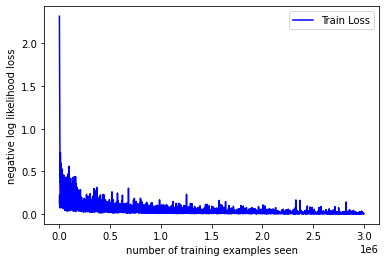

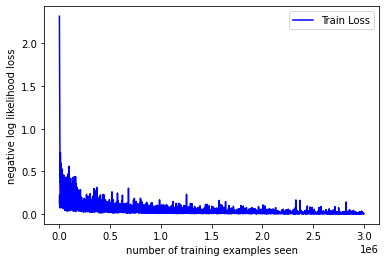

In [25]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig